<a href="https://colab.research.google.com/github/MinjungHuh/myrepo/blob/master/scikit_learn_1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##scikit-learn 설치

In [ ]:
pip install scikit-learn

# iris dataset

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
load_iris??

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
data
#데이터 형태 :  Bunch
#딕셔너리와 같은 형태. 

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# digits dataset

In [ ]:
from sklearn import datasets  
digits = datasets.load_digits()

In [ ]:
digits??

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

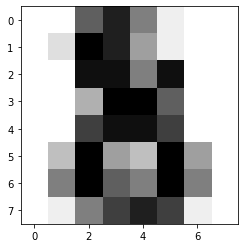

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

In [ ]:
digits.target[-1]

8

#Boston House dataset

In [ ]:
import os  # OS에서 작업하고 싶을때
import tarfile # 압축파일 해제 
from six.moves import urllib # URL 상의 데이터를 불러오겠다

In [ ]:
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml/raw/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "/datasets/housing/housing.tgz"

In [ ]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path = housing_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
!ls datasets/housing

In [ ]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.head()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
!ls /content/datasets/housing

In [ ]:
import pandas as pd
housing.to_csv("/content/datasets/housing/housing.csv")

In [ ]:
housing["median_income"].hist()

In [ ]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing

In [ ]:
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)
housing

In [ ]:
housing["income_cat"].value_counts()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,3))
housing["income_cat"].hist()
fig.savefig("/content/datasets/housing/income_category_hist")

In [ ]:
!ls /content/datasets/housing

In [ ]:
import pandas as pd
housing.to_csv("/content/datasets/housing/housing.csv")

In [ ]:
housing["median_income"].hist()

In [ ]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing

In [ ]:
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)
housing

In [ ]:
housing["income_cat"].value_counts()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,3))
housing["income_cat"].hist()
fig.savefig("/content/datasets/housing/income_category_hist")

In [ ]:
!ls /content/datasets/housing

# Data Processing

In [ ]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [ ]:
import numpy as np
x = (np.arange(10, dtype=np.float) - 3).reshape(-1, 1)

In [ ]:
x

In [ ]:
import pandas as pd
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), \
                  columns = ["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])

In [ ]:
df

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data1 = iris.data
data2 = scale(iris.data)
data4 = minmax_scale(data1)
data1.shape # 데이터 설명

In [ ]:
print("old mean:", np.mean(data1, axis=0))
print("old std:", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std:", np.std(data2, axis=0))

In [ ]:
import seaborn as sns
sns.set()
sns.jointplot(data1[:,0], data1[:,1])
plt.show()
sns.jointplot(data2[:,0], data2[:,1])
plt.show()
sns.jointplot(data4[:,0], data4[:,1])
plt.show()

In [ ]:
from sklearn.preprocessing import scale, normalize
x = np.tile(range(-2,3),(2,1))
x[0]-=18
x = x.T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normalize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data1 = iris.data[:, :2]
data3 = normalize(data1)
sns.jointplot(data1[:,0], data1[:,1])
plt.show()
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def all_but_first_column(X):
  return X[:, :1]

X = np.arange(12).reshape(4,3)
print(X)

In [ ]:
Y = FunctionTransformer(all_but_first_column).fit_transform(X)
print(Y)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def all_but_first_column(X):
  return X*0.5

X = np.arange(12).reshape(4, 3)
print(X)

In [ ]:
Y = FunctionTransformer(all_but_first_column).fit_transform(X)
print(Y)

#Statistical Model

### Correlation Coefficient 

In [ ]:
#generate related variables

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
#summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
#plot
pyplot.scatter(data1, data2)

In [ ]:
mean1 = mean(data1)
std1 = std(data1)
mean2 = mean(data2)
std2 = std(data2)
Qx = data1 - mean1
Qy = data2 - mean2
Q = Qx * Qy

In [ ]:
print(Q.shape)
print(len(Q))

In [ ]:
r = sum(Q)/((len(Q)-1)*std1*std2)
print('correlation coefficient:', r)

In [ ]:
import pandas as pd
rows = [int(i) for i in range(len(data1))]
s_d1 = pd.Series(data1, index=rows)
s_d2 = pd.Series(data2, index=rows)
clm = ['data1', 'data2']
d = pd.DataFrame(columns=clm)
d['data1'] = s_d1
d['data2'] = s_d2
d

In [ ]:
d.corr()

[Pearson's correlation](https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)

In [ ]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr1, _ = pearsonr(data1, data2)
print('Pearsons correlation between data1 and data2 : %.3f' % corr1)

In [ ]:
#generate related variables

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = -data1 + (10 * randn(1000) + 50)
#summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
#plot
pyplot.scatter(data1, data2)

In [ ]:
mean1 = mean(data1)
std1 = std(data1)
mean2 = mean(data2)
std2 = std(data2)
Qx = data1 - mean1
Qy = data2 - mean2
Q = Qx * Qy

In [ ]:
r = sum(Q)/((len(Q)-1)*std1*std2)
print('correlation coefficient:', r)

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape
# data[:,0] : sepal length in cm
# data[:,1] : sepal width in cm
# data[:,2] : petal length in cm
# data[:,3] : petal width in cm

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set()
sns_iris = sns.load_dataset('iris')
sns.pairplot(sns_iris, hue='species', size=1.5)

## 실습 : iris data , correlation coefficient

### Q1. iris data 의 sepal width 와 petal width 의 상관 관계 계수를 구하시요

### Q2. iris data 의 petal length,  petal width 의 상관 관계 계수를 구하시요

### Q3. iris data 의 petal length,  petal width 의 pearson 상관계수를 구하시오. sepal width 와 petal width 의 pearson 상관 관계 계수를 구하시요